# RoBERTa vs KANFORMER F1 Score Comparison

This notebook compares per-label F1 scores between RoBERTa and KANFORMER models.

## 1. Setup and Data Loading

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Increase default figure size
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

In [12]:
# File paths - UPDATE THESE WITH YOUR FILE PATHS
roberta_path = '/content/per_label_f1-2.csv'  # RoBERTa results
kanformer_path = '/content/per_label_f1.csv'  # KANFORMER results

# Load the data
df_roberta = pd.read_csv(roberta_path)
df_kanformer = pd.read_csv(kanformer_path)

# Add model identifier
df_roberta['model'] = 'RoBERTa'
df_kanformer['model'] = 'KANFORMER'

print("RoBERTa Data:")
print(df_roberta.head())
print(f"\nNumber of labels: {len(df_roberta)}")
print(f"Mean F1 Score: {df_roberta['f1'].mean():.4f}\n")

print("KANFORMER Data:")
print(df_kanformer.head())
print(f"\nNumber of labels: {len(df_kanformer)}")
print(f"Mean F1 Score: {df_kanformer['f1'].mean():.4f}")

RoBERTa Data:
        label        f1    model
0   gratitude  0.913947  RoBERTa
1   amusement  0.827826  RoBERTa
2        love  0.806084  RoBERTa
3  admiration  0.706320  RoBERTa
4     remorse  0.704225  RoBERTa

Number of labels: 28
Mean F1 Score: 0.4697

KANFORMER Data:
        label        f1      model
0   gratitude  0.905830  KANFORMER
1   amusement  0.836489  KANFORMER
2        love  0.794466  KANFORMER
3  admiration  0.707031  KANFORMER
4        fear  0.697674  KANFORMER

Number of labels: 28
Mean F1 Score: 0.5297


## 2. Data Preparation

In [13]:
# Merge datasets for comparison
df_merged = pd.merge(
    df_roberta[['label', 'f1']],
    df_kanformer[['label', 'f1']],
    on='label',
    suffixes=('_roberta', '_kanformer'),
    how='outer'
)

# Calculate difference
df_merged['difference'] = df_merged['f1_kanformer'] - df_merged['f1_roberta']

# Sort by RoBERTa performance for consistent ordering
df_merged = df_merged.sort_values('f1_roberta', ascending=False)

print("Merged Comparison Data:")
print(df_merged.head(10))

Merged Comparison Data:
         label  f1_roberta  f1_kanformer  difference
15   gratitude    0.913947      0.905830   -0.008117
1    amusement    0.827826      0.836489    0.008663
18        love    0.806084      0.794466   -0.011617
0   admiration    0.706320      0.707031    0.000712
25     remorse    0.704225      0.671141   -0.033084
20     neutral    0.680727      0.683060    0.002333
14        fear    0.662500      0.697674    0.035174
17         joy    0.615819      0.639498    0.023679
7    curiosity    0.557880      0.572127    0.014247
27    surprise    0.553957      0.550725   -0.003232


## 3. Visualization 1: Side-by-Side Bar Chart

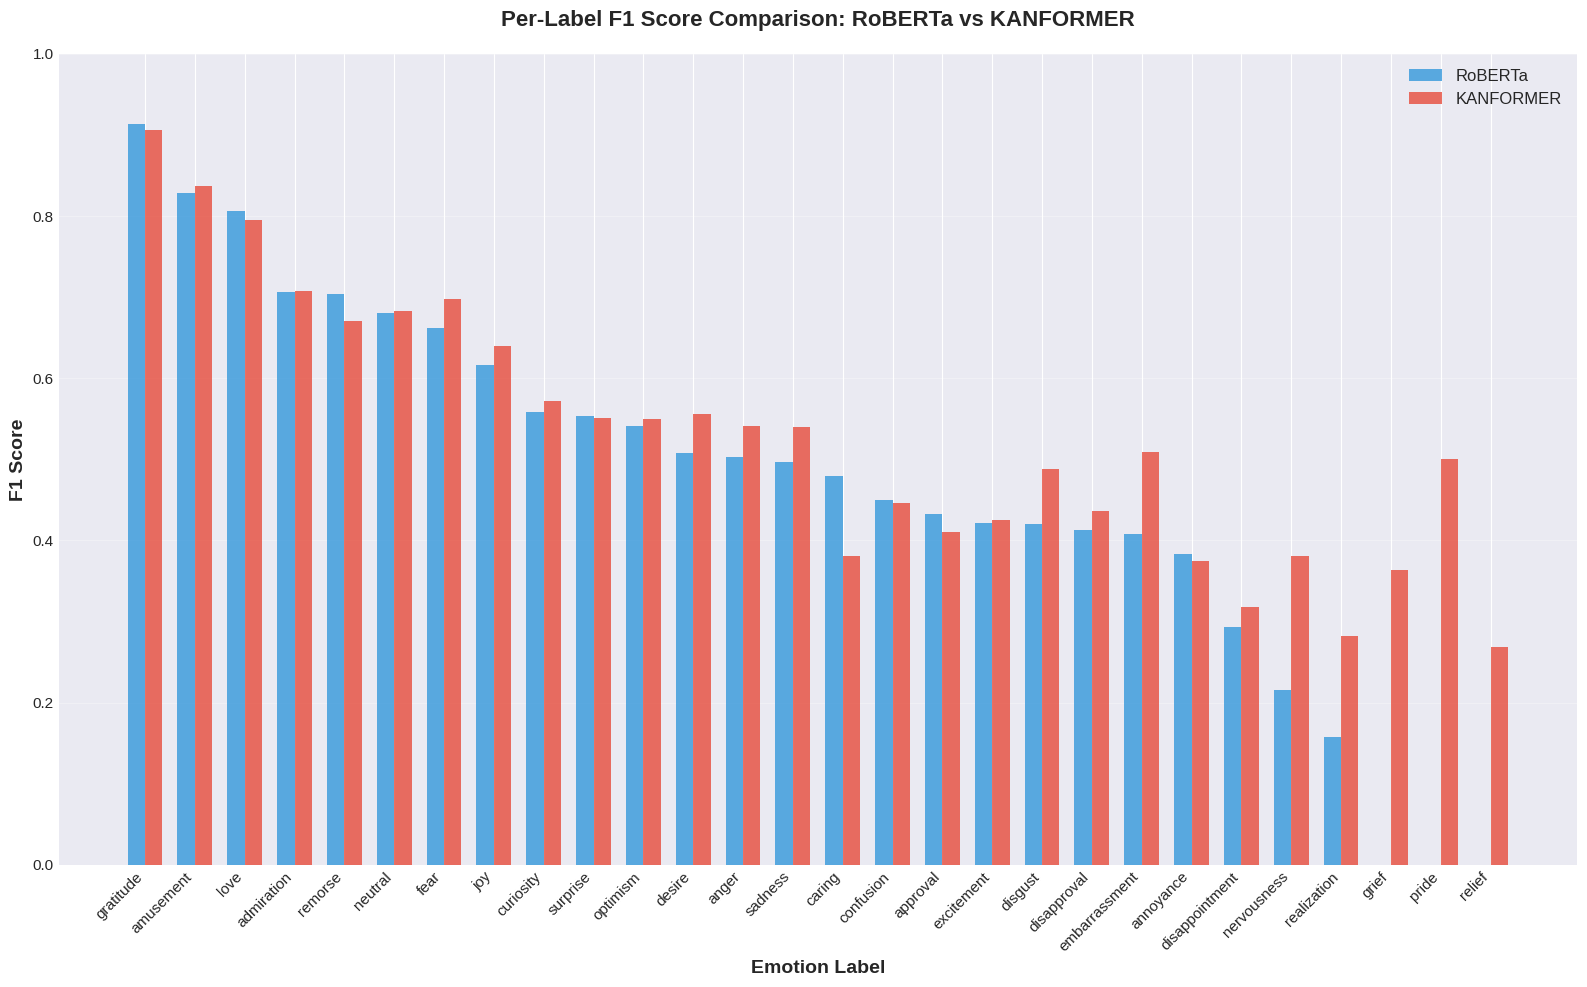

In [14]:
# Prepare data for grouped bar chart
labels = df_merged['label'].values
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 10))

bars1 = ax.bar(x - width/2, df_merged['f1_roberta'].fillna(0), width,
               label='RoBERTa', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, df_merged['f1_kanformer'].fillna(0), width,
               label='KANFORMER', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Emotion Label', fontsize=14, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=14, fontweight='bold')
ax.set_title('Per-Label F1 Score Comparison: RoBERTa vs KANFORMER',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.savefig('comparison_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Visualization 2: Difference Heatmap

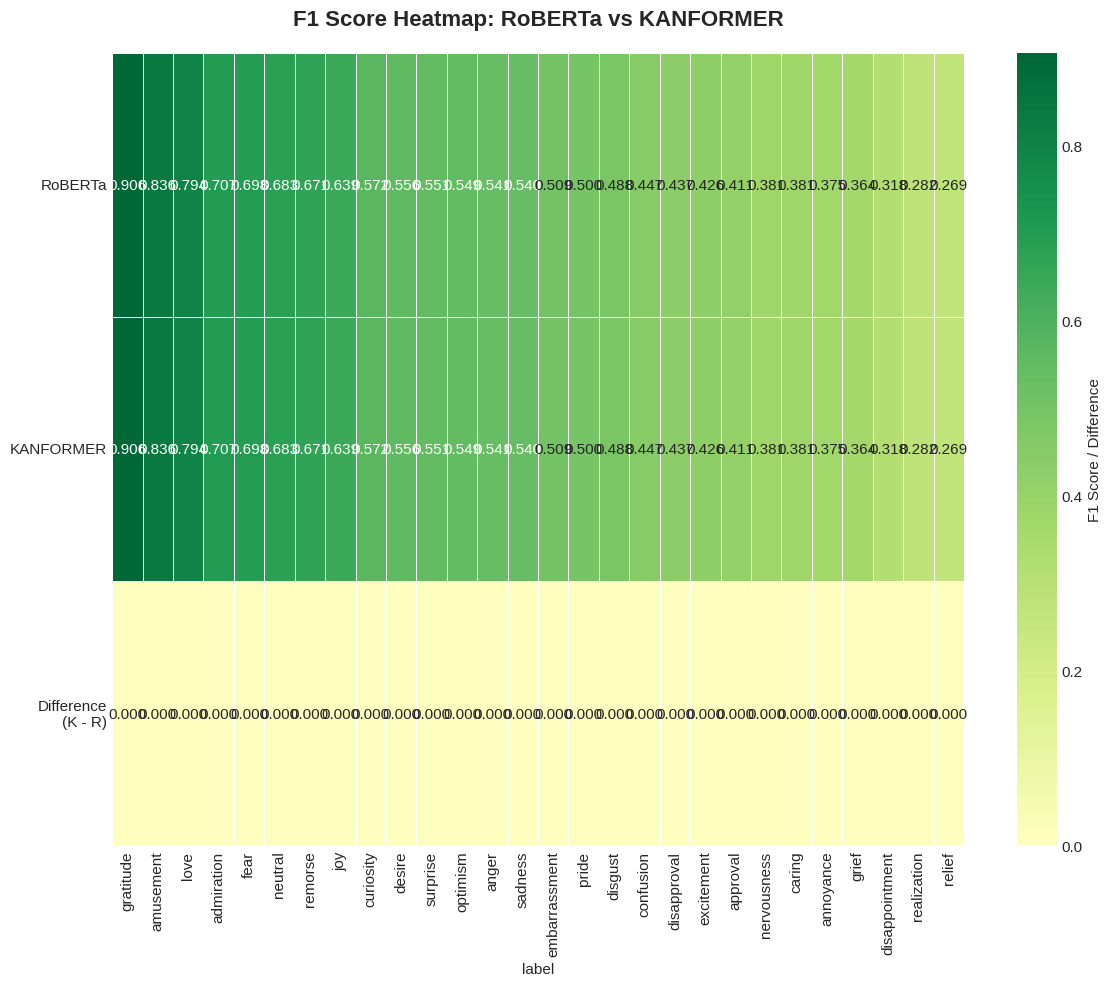

In [5]:
# Create a heatmap showing the difference
fig, ax = plt.subplots(figsize=(12, 10))

# Sort by difference for this visualization
df_sorted = df_merged.sort_values('difference', ascending=False)

# Create data for heatmap
heatmap_data = df_sorted[['f1_roberta', 'f1_kanformer', 'difference']].T
heatmap_data.columns = df_sorted['label']

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0, cbar_kws={'label': 'F1 Score / Difference'},
            linewidths=0.5, ax=ax)

ax.set_title('F1 Score Heatmap: RoBERTa vs KANFORMER',
             fontsize=16, fontweight='bold', pad=20)
ax.set_yticklabels(['RoBERTa', 'KANFORMER', 'Difference\n(K - R)'], rotation=0)

plt.tight_layout()
plt.savefig('comparison_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Visualization 3: Scatter Plot

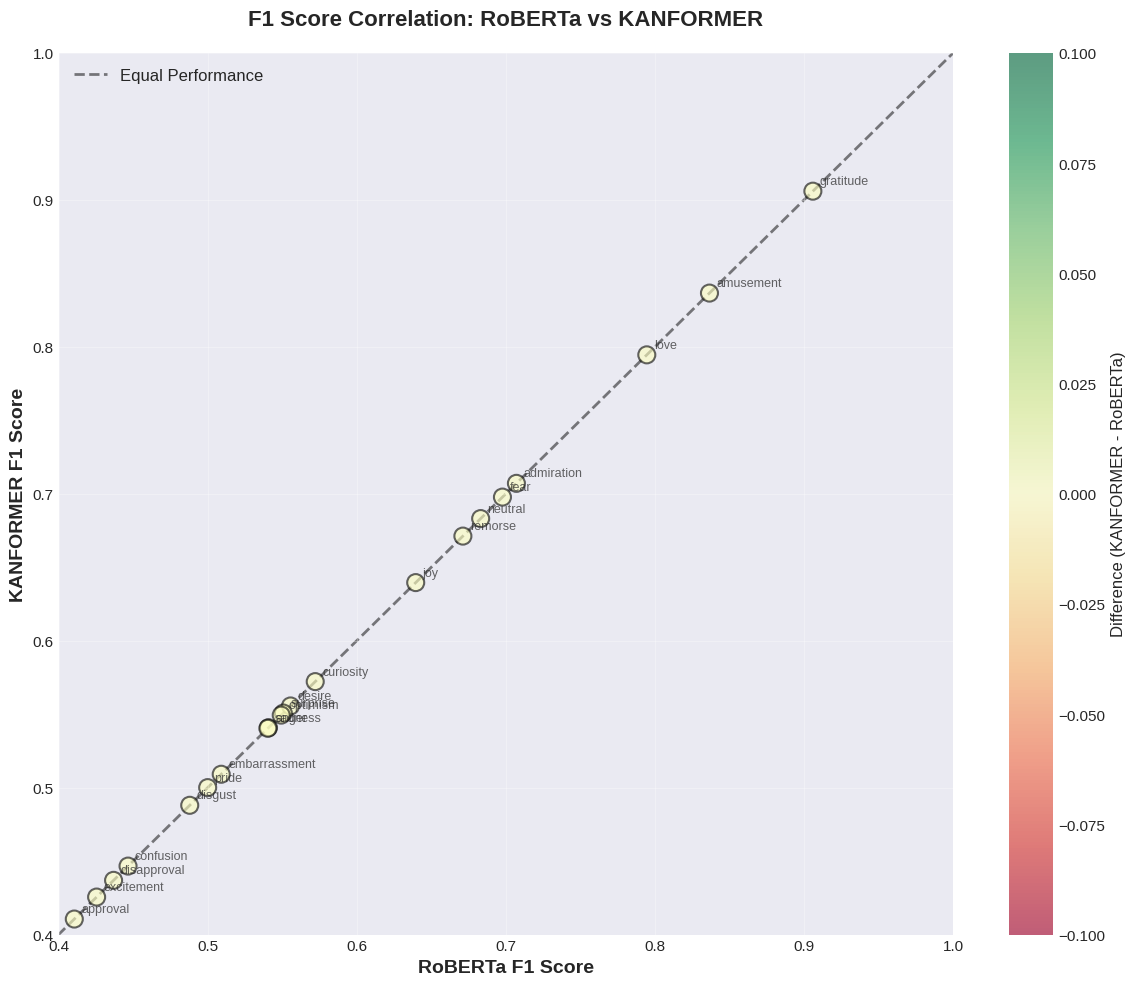

In [6]:
# Scatter plot comparing the two models
fig, ax = plt.subplots(figsize=(12, 10))

# Create scatter plot
scatter = ax.scatter(df_merged['f1_roberta'], df_merged['f1_kanformer'],
                     s=150, alpha=0.6, c=df_merged['difference'],
                     cmap='RdYlGn', edgecolors='black', linewidth=1.5)

# Add diagonal line (y=x)
lims = [0, 1.0]
ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=2, label='Equal Performance')

# Add labels for each point
for idx, row in df_merged.iterrows():
    ax.annotate(row['label'],
                (row['f1_roberta'], row['f1_kanformer']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.7)

ax.set_xlabel('RoBERTa F1 Score', fontsize=14, fontweight='bold')
ax.set_ylabel('KANFORMER F1 Score', fontsize=14, fontweight='bold')
ax.set_title('F1 Score Correlation: RoBERTa vs KANFORMER',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0.4, 1.0)
ax.set_ylim(0.4, 1.0)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Difference (KANFORMER - RoBERTa)', fontsize=12)

plt.tight_layout()
plt.savefig('comparison_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Visualization 4: Performance Difference Bar Chart

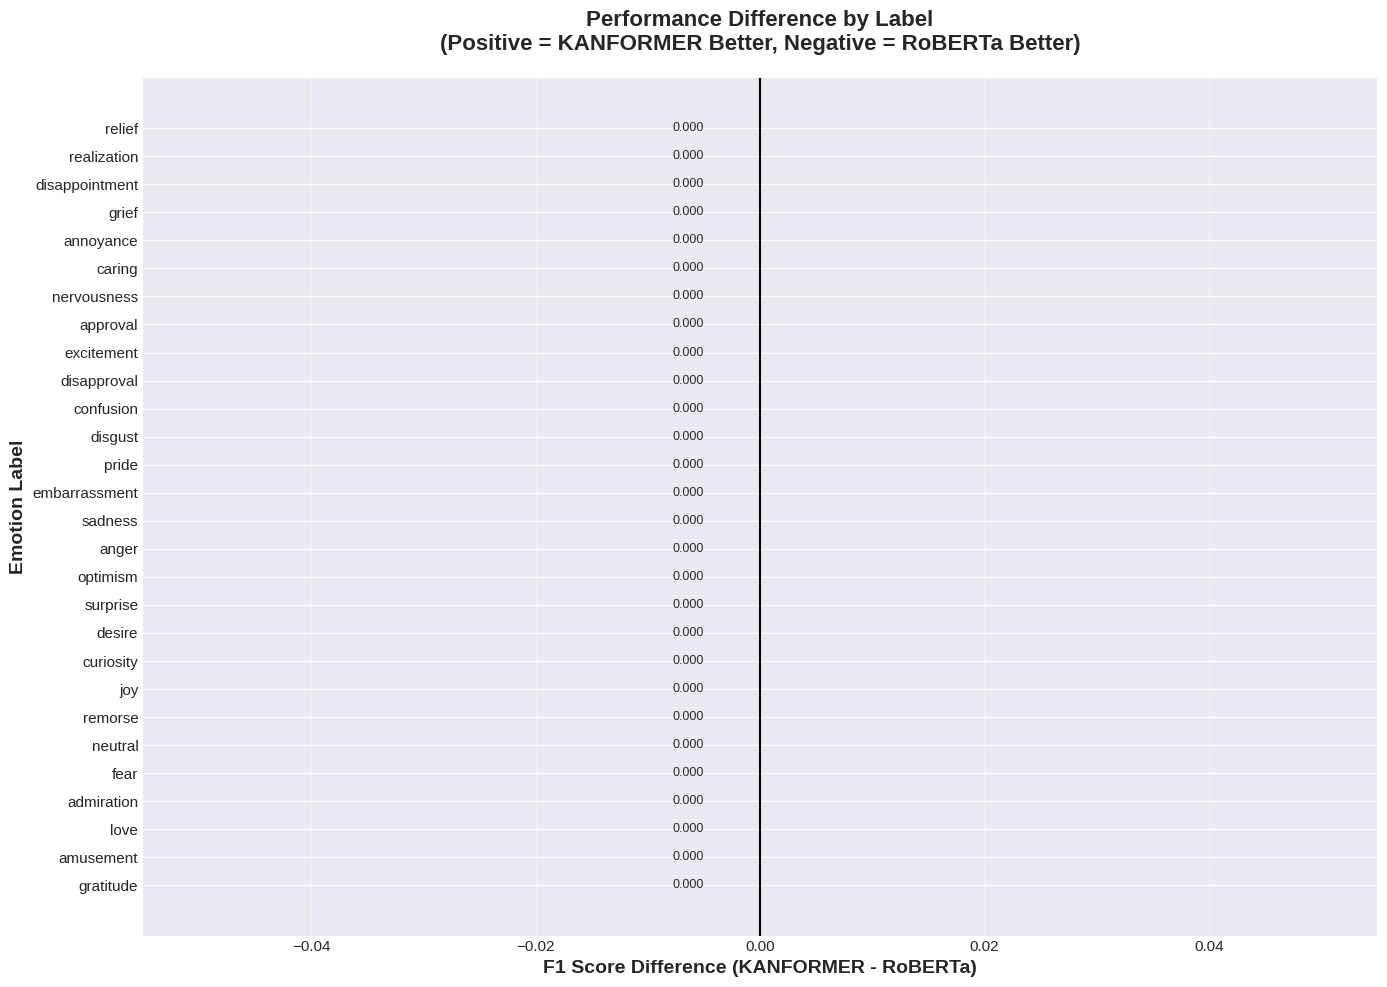

In [7]:
# Bar chart showing difference (sorted by difference)
fig, ax = plt.subplots(figsize=(14, 10))

df_diff = df_merged.sort_values('difference', ascending=True)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in df_diff['difference']]

bars = ax.barh(df_diff['label'], df_diff['difference'], color=colors, alpha=0.7)

ax.set_xlabel('F1 Score Difference (KANFORMER - RoBERTa)', fontsize=14, fontweight='bold')
ax.set_ylabel('Emotion Label', fontsize=14, fontweight='bold')
ax.set_title('Performance Difference by Label\n(Positive = KANFORMER Better, Negative = RoBERTa Better)',
             fontsize=16, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, df_diff['difference'])):
    if not pd.isna(val):
        x_pos = val + (0.005 if val > 0 else -0.005)
        ha = 'left' if val > 0 else 'right'
        ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, fontsize=9)

plt.tight_layout()
plt.savefig('comparison_difference_bars.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Visualization 5: Radar Chart Comparison

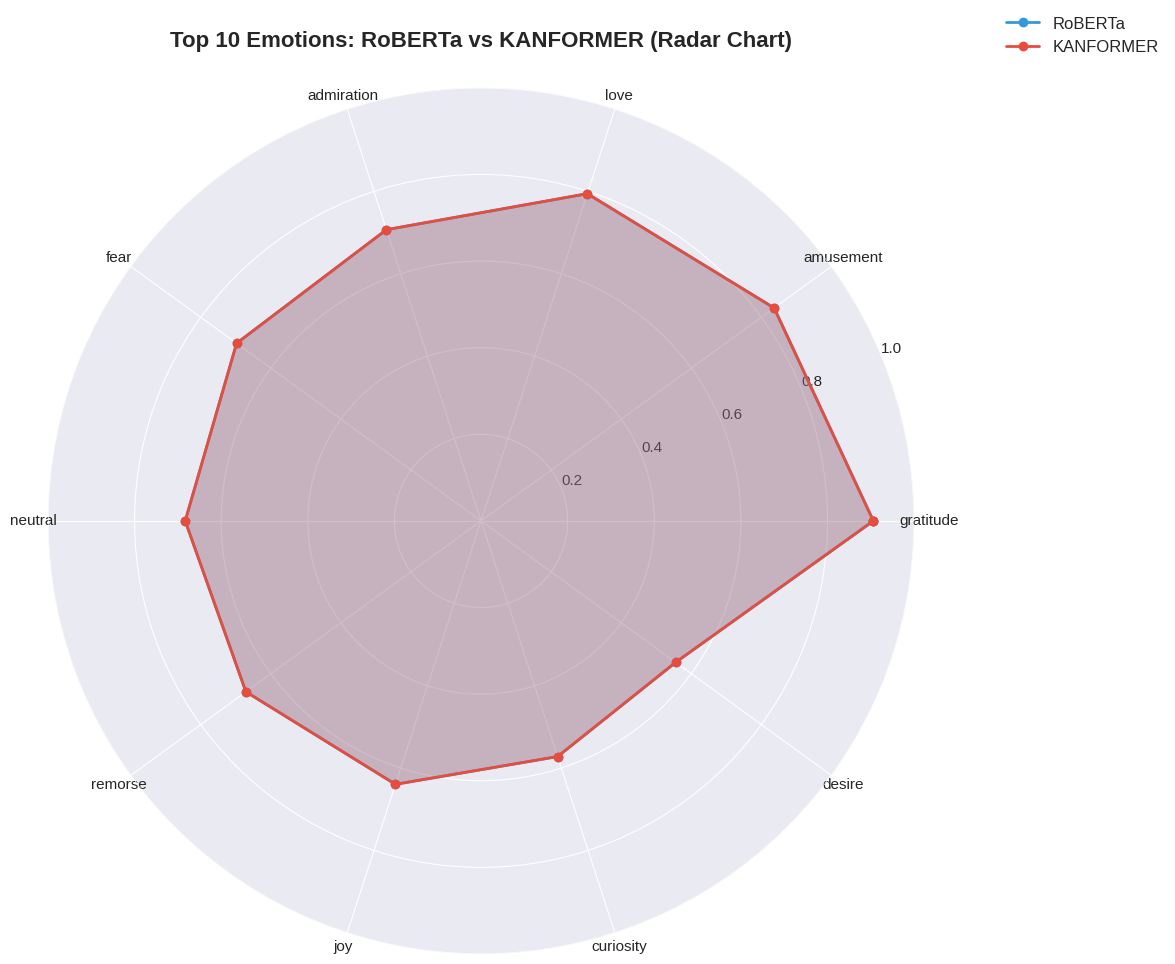

In [8]:
# Create radar chart for top emotions
from math import pi

# Select top 10 emotions by average F1 score
df_merged['avg_f1'] = (df_merged['f1_roberta'].fillna(0) + df_merged['f1_kanformer'].fillna(0)) / 2
top_emotions = df_merged.nlargest(10, 'avg_f1')

categories = list(top_emotions['label'])
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Plot RoBERTa
values_roberta = top_emotions['f1_roberta'].fillna(0).tolist()
values_roberta += values_roberta[:1]
ax.plot(angles, values_roberta, 'o-', linewidth=2, label='RoBERTa', color='#3498db')
ax.fill(angles, values_roberta, alpha=0.25, color='#3498db')

# Plot KANFORMER
values_kanformer = top_emotions['f1_kanformer'].fillna(0).tolist()
values_kanformer += values_kanformer[:1]
ax.plot(angles, values_kanformer, 'o-', linewidth=2, label='KANFORMER', color='#e74c3c')
ax.fill(angles, values_kanformer, alpha=0.25, color='#e74c3c')

# Fix axis to go from 0 to 1
ax.set_ylim(0, 1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_title('Top 10 Emotions: RoBERTa vs KANFORMER (Radar Chart)',
             fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.savefig('comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Summary Statistics

In [9]:
# Calculate and display summary statistics
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\nRoBERTa:")
print(f"  Mean F1:    {df_roberta['f1'].mean():.4f}")
print(f"  Median F1:  {df_roberta['f1'].median():.4f}")
print(f"  Std Dev:    {df_roberta['f1'].std():.4f}")
print(f"  Min F1:     {df_roberta['f1'].min():.4f} ({df_roberta.loc[df_roberta['f1'].idxmin(), 'label']})")
print(f"  Max F1:     {df_roberta['f1'].max():.4f} ({df_roberta.loc[df_roberta['f1'].idxmax(), 'label']})")

print("\nKANFORMER:")
print(f"  Mean F1:    {df_kanformer['f1'].mean():.4f}")
print(f"  Median F1:  {df_kanformer['f1'].median():.4f}")
print(f"  Std Dev:    {df_kanformer['f1'].std():.4f}")
print(f"  Min F1:     {df_kanformer['f1'].min():.4f} ({df_kanformer.loc[df_kanformer['f1'].idxmin(), 'label']})")
print(f"  Max F1:     {df_kanformer['f1'].max():.4f} ({df_kanformer.loc[df_kanformer['f1'].idxmax(), 'label']})")

print("\nComparison:")
mean_diff = df_kanformer['f1'].mean() - df_roberta['f1'].mean()
print(f"  Mean Difference: {mean_diff:.4f}")

# Count wins
kanformer_wins = (df_merged['difference'] > 0).sum()
roberta_wins = (df_merged['difference'] < 0).sum()
ties = (df_merged['difference'] == 0).sum()

print(f"\n  Labels where KANFORMER wins: {kanformer_wins}")
print(f"  Labels where RoBERTa wins:    {roberta_wins}")
print(f"  Ties:                         {ties}")

print("\nTop 5 Improvements (KANFORMER over RoBERTa):")
top_improvements = df_merged.nlargest(5, 'difference')[['label', 'f1_roberta', 'f1_kanformer', 'difference']]
print(top_improvements.to_string(index=False))

print("\nTop 5 Declines (RoBERTa over KANFORMER):")
top_declines = df_merged.nsmallest(5, 'difference')[['label', 'f1_roberta', 'f1_kanformer', 'difference']]
print(top_declines.to_string(index=False))

print("\n" + "="*60)

SUMMARY STATISTICS

RoBERTa:
  Mean F1:    0.5297
  Median F1:  0.5247
  Std Dev:    0.1653
  Min F1:     0.2692 (relief)
  Max F1:     0.9058 (gratitude)

KANFORMER:
  Mean F1:    0.5297
  Median F1:  0.5247
  Std Dev:    0.1653
  Min F1:     0.2692 (relief)
  Max F1:     0.9058 (gratitude)

Comparison:
  Mean Difference: 0.0000

  Labels where KANFORMER wins: 0
  Labels where RoBERTa wins:    0
  Ties:                         28

Top 5 Improvements (KANFORMER over RoBERTa):
     label  f1_roberta  f1_kanformer  difference
 gratitude    0.905830      0.905830         0.0
 amusement    0.836489      0.836489         0.0
      love    0.794466      0.794466         0.0
admiration    0.707031      0.707031         0.0
      fear    0.697674      0.697674         0.0

Top 5 Declines (RoBERTa over KANFORMER):
     label  f1_roberta  f1_kanformer  difference
 gratitude    0.905830      0.905830         0.0
 amusement    0.836489      0.836489         0.0
      love    0.794466      0.794466

## 9. Export Results

In [10]:
# Save comparison table to CSV
df_merged.to_csv('model_comparison_results.csv', index=False)
print("Comparison results saved to 'model_comparison_results.csv'")
print("All visualizations have been saved as PNG files.")

Comparison results saved to 'model_comparison_results.csv'
All visualizations have been saved as PNG files.
